# Parte 1 - Lo básico

¡Bienvenido a la Parte 1!

Aquí, aprenderemos los fundamentos de las redes neuronales e implementaremos un perceptrón, la red neuronal más simple. Pero primero, definamos algunas funciones que nos ayudarán a graficar y visualizar los datos.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s=25, color='blue', edgecolor='k')
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s=25, color='red', edgecolor='k')
    
def plot_line(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

Sin más preámbulos, ¡comencemos!

## Índice

- [AI vs ML vs DL](#ai-ml-dl)
- [¿Qué es una red neuronal?](#neural-network)
- [Predecir](#prediction)
- [Comparar](#compare)
- [Aprender](#learn)
- [Implementación completa en un caso real](#full-implementation)

## AI vs ML vs DL <a id='ai-ml-dl'></a>

Antes de profundizar en las redes neuronales, necesitamos algo de contexto.

### Inteligencia Artificial (Artificial Intelligence)
Todo comienza aquí. La Inteligencia Artificial (AI, abreviado en inglés) es el concepto más amplio de máquinas que pueden llevar a cabo tareas de una manera que podríamos considerar "inteligente".

### Aprendizaje Automático (Machine Learning)
El Aprendizaje Automático (ML, abreviado en inglés) es un subcampo de las Ciencias Computacionales dedicado al estudio y desarrollo de máquinas que puedan aprender a realizar tareas para las cuales no fueron programadas explícitamente. Se basa en la idea de que sólo deberíamos ser capaces de dar a las máquinas acceso a los datos y permitirles aprender por sí mismas.

Hay 2 tipos principales de aprendizaje automático:
- **Aprendizaje automático supervisado**: es la imitación directa del patrón entre 2 conjuntos de datos. Siempre intenta tomar un conjunto de datos de entrada y transformarlo en un conjunto de datos de salida (usar las películas que te gusta para predecir las películas que te pueden gustar).
- **Aprendizaje automático no supervisado**: comparte una propiedad en común con el aprendizaje supervisado. Transforma un conjunto de datos en otro. Sin embargo, el conjunto de datos en el que se transforma no se conoce o comprende previamente (agrupar un conjunto de datos en grupos es un tipo de aprendizaje no supervisado).

### Aprendizaje Profundo (Deep Learning)
El Aprendizaje Profundo (DL, abreviado en inglés) es un subconjunto de métodos en la caja de herramientas del aprendizaje automático, aprovechando principalmente las Redes Neuronales Artificiales (ANN), que son una clase de algoritmos inspirados en la forma en que funciona el cerebro humano.

Puedes pensar en la relación de AI, ML y DL de la siguiente manera:

![AI vs ML vs DL](img/part1/1.png)

## ¿Qué es una red neuronal? <a id='neural-network'></a>

Las redes neuronales están en el corazón del aprendizaje profundo, son algoritmos inspirados por la forma en que funciona el cerebro y diseñados para imitar nuestra propia toma de decisiones.

Una forma en que podemos aprovechar el poder de las redes neuronales es en la predicción. Por ejemplo, podemos predecir si un estudiante será admitido en un programa de posgrado basándonos en ciertas características (calificaciones y puntaje del examen de admisión). Una red neuronal puede hacer su trabajo con la ayuda de parámetros llamados pesos, que se pueden considerar como perillas que procesarán los datos de entrada de la red neuronal y los transformarán en una predicción.

Definamos el problema que resolveremos usando redes neuronales:  
Supongamos que somos la oficina de admisiones en una universidad y nuestro trabajo es aceptar o rechazar estudiantes. Entonces, para evaluar a los estudiantes, tenemos 2 piezas de información: los resultados de un examen y sus calificaciones en preparatoria.

Ahora, echemos un vistazo a algunos estudiantes de ejemplo (los datos se normalizan para mejores predicciones), los puntos azules corresponden a los estudiantes que fueron aceptados, y los puntos rojos a los estudiantes que fueron rechazados:

<function matplotlib.pyplot.show>

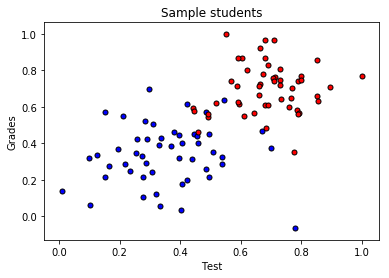

In [2]:
data = pd.read_csv('data/part1.csv', header=None) # 100 filas × 3 columnas
X = np.array(data[[0, 1]])
y = np.array(data[2])
plot_points(X, y)
plt.title("Sample students")
plt.xlabel('Test')
plt.ylabel('Grades')
plt.show

Si observas con atención, parece que estos datos pueden estar bien separados por una línea que es esta línea aquí:

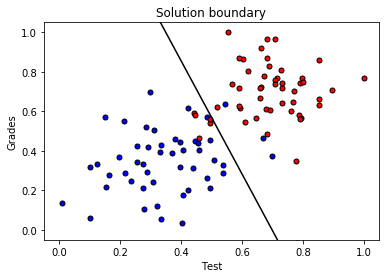

In [3]:
plot_points(X, y)
plt.title("Solution boundary")
plt.xlabel('Test')
plt.ylabel('Grades')
plot_line(-2.86, 2.0, 'black')
plt.show()

Y parece que la mayoría de los estudiantes que se encuentran sobre la línea son rechazados, y la mayoría de los estudiantes que están por debajo de la línea son aceptados. Entonces esta línea va a ser nuestro modelo.

Vale la pena señalar que nuestro modelo comete un par de errores ya que hay algunos puntos azules que están sobre la línea y algunos puntos rojos que están debajo de la línea, pero por simplicidad, no vamos a preocuparnos por esos casos.

Finalmente, diremos que es seguro predecir que si un punto está por debajo de la línea, el alumno es aceptado y si está sobre la línea el alumno es rechazado.

Pero, ¿cómo encontramos esa línea? Lo haremos con la ayuda de un perceptrón.

###  Perceptrón

Los perceptrones son los bloques de construcción de las redes neuronales y son codificaciones de ecuaciones en un pequeño grafo. Un perceptrón es la red neuronal más simple y se ve así:

![Perceptron](img/part1/2.png)

El perceptrón toma algunas entradas $x_1$ y $x_2$, y esas entradas se multiplican por los pesos $W_1$ y $W_2$, y ese resultado se pasa a través de una función de activación (la función de activación de un nodo es la función que define la salida de ese nodo dado un conjunto de entradas) que da una probabilidad.

¿Por qué estos objetos se llaman redes neuronales? Porque los perceptrones se parecen a las neuronas en el cerebro. De manera similar, las neuronas en el cerebro toman entradas (impulsos nerviosos) que provienen de las dendritas, luego las neuronas hacen algo con los impulsos nerviosos y, finalmente, deciden si emiten un impulso nervioso o no a través del axón.

Podemos combinar perceptrones para que la salida de uno se convierta en la entrada de otro, esto es lo que forma un perceptrón multicapa o una red neuronal.

Ahora, ¿qué ecuación codificaremos en el perceptrón? Dado que estamos buscando la línea anterior, necesitamos una ecuación lineal, como la siguiente:

$$
W_1 x_1 + W_2 x_2 - 10 = 0
$$

Donde $x_1$ corresponde al examen y $x_2$ a las calificaciones, y $-10$ a un $bias$ (sesgo):

$$
W_1*Examen + W_2*Calificaciones - b
$$

Cuando ingresa un nuevo alumno, reemplazamos sus valores del examen y calificaciones en la ecuación y verificamos el resultado. El resultado nos dirá si el alumno es aceptado o rechazado.

Pero hay un problema, no sabemos los valores correctos para los pesos $W_1$ y $W_2$. Para encontrar esos valores, una red neuronal deberá seguir estos pasos:
- **Predecir**: el primer paso consiste en reunir la información de un alumno en nuestros datos de muestra, enviarla a través de la red neuronal y hacer una predicción de la probabilidad de que el alumno sea aceptado.
- **Comparar**: el segundo paso es comparar la predicción con el patrón que nos importa (si el alumno fue aceptado). En este paso, encontraremos algunas diferencias sobre lo que predecimos y el valor objetivo, y debido a que queremos que nuestra red neuronal sea precisa, esto nos lleva al próximo paso.
- **Aprender**: este paso ajusta los pesos $W_1$ y $W_2$ analizando por cuánto falló el modelo y cuáles fueron los datos de entrada en el momento de la predicción.

Cuantos más datos tengamos para entrenar nuestra red neuronal, mejores serán las predicciones. Es por eso que repetiremos muchas veces el entrenamiento de la red a través de nuestros datos de muestra.

## Predecir <a id='prediction'></a>

Es hora de introducir un poco de matemáticas. Para la parte de predicción, necesitamos las siguientes funciones:

- Función de activación sigmoide

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- Fórmula para el resultado (predicción)

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

Que en código tenemos:

In [4]:
# Función de activación (sigmoide)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Fórmula del resultado (predicción)
def output_formula(features, weights, bias):
    return sigmoid(np.matmul(features,weights) + bias)

Supongamos que comenzamos con los pesos $W_1 = 0.25$, $W_2 = 0.12$ y $b = 1$. A continuación, tomamos los datos del primer estudiante:

In [5]:
X[0]

array([ 0.78051 , -0.063669])

Entonces tenemos $x_1 = 0.78051$ y $x_2 = -0.063669$. Ahora calculamos la predicción (un valor entre 0 y 1) de la siguiente forma:

In [6]:
weights = [0.25, 0.12]
prediction = output_formula(X[0], weights, 1)
prediction

0.76629135433742024

Cuanto más cerca a 1 se encuentra la predicción, mayor es la probabilidad de que el alumno sea aceptado.

## Comparar <a id='compare'></a>

Con nuestra predicción calculada, debemos compararla con el valor real para el primer alumno:

In [7]:
y[0] # 1 si el estudiante fue aceptado, 0 de forma contraria.

1

En este paso, tenemos que definir una medida de cuánto "falló" nuestra predicción. Esta medida es nuestra función de error:

- Función de error

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

Como puedes ver, esta función depende del valor objetivo y nuestro valor predicho. Entonces, el código para el error es:

In [8]:
# Fórmula de error (log-loss)
def error_formula(y, output):
    return (-y * np.log(output)) - ((1 - y) * np.log(1 - output))

En el caso del primer alumno tenemos:

In [9]:
error = error_formula(y[0], prediction)
error

0.26619282341652073

## Aprender <a id='learn'></a>

Para que nuestra red neuronal pueda hacer mejores predicciones, tiene que ajustar sus pesos, y lo hace mediante el uso de una técnica llamada *Descenso de gradiente*, un algoritmo utilizado para realizar optimizaciones y para encontrar el mínimo de una función. Este proceso toma pasos proporcionales al negativo del gradiente de la función de error en un punto actual.

La parte de "aprendizaje" toma nuestro error y le dice a cada peso cómo puede cambiar su valor para reducir el error. De esta forma, al final tendremos nuevos pesos que harán mejores predicciones.

Las siguientes formulas nos ayudarán en esta parte:

- Función que actualiza los pesos y el sesgo

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$

La constante $a$ es llamada tasa de aprendizaje y es utilizada para decrementar la magnitud de los incrementos en los cambios de los pesos, de modo que se realicen cambios pequeños.

Las funciones en código son las siguientes:

In [10]:
# Descenso de gradiente
def update_weights(x, y, weights, bias, learnrate):
    output = output_formula(x, weights, bias)
    weights += learnrate*(y - output)*x
    bias += learnrate*(y - output)
    return weights, bias

Siguiendo con nuestro primer estudiante:

In [11]:
new_weights, b = update_weights(X[0], y[0], weights, 1, 0.01)

print('Original weights:', weights)
print('New weights:', new_weights)

Original weights: [0.25, 0.12]
New weights: [ 0.25182412  0.1198512 ]


## Implementación completa en un caso real <a id='full-implementation'></a>

Nada mejor que juntar todas las piezas.

Vamos a iterar muchas veces a través de todos los datos de muestra y realizar los 3 pasos descritos anteriormente. Cada iteración a través de todos los datos de muestra se llamará *epoch*.

Definamos la función de entrenamiento que nos ayudará en este proceso. También graficará los datos y algunas de las líneas obtenidas a medida que ejecutamos el algoritmo:

In [12]:
np.random.seed(44) # Usar la misma semilla para depurar con facilidad

epochs = 100
learnrate = 0.01

original_weights = []
final_weights = []
final_bias = 0

def train(features, targets, epochs, learnrate, graph_lines=False):
    global original_weights
    global final_weights
    global final_bias
    
    errors = []
    last_loss = None
    n_records, n_features = features.shape
    weights = np.random.normal(scale=1/n_features**0.5, size=n_features)
    original_weights = list(weights)
    bias = 0
    
    # Para cada iteración a través de todos los datos muestra
    for e in range(epochs):
        # Iterar en los datos de cada estudiante
        for x, y in zip(features, targets):
            weights, bias = update_weights(x, y, weights, bias, learnrate)
            
        # Imprimir el error después de iterar en todos los estudiantes
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        
        if graph_lines and e % (epochs / 100) == 0:
            plot_line(-weights[0]/weights[1], -bias/weights[1])
    
    # Graficar la línea de la solución
    plt.title("Solution boundary")
    plot_line(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Graficar los datos
    plot_points(features, targets)
    plt.show()

    # Graficar el error
    plt.title("Error Plot")
    plt.ylabel('Error')
    plt.xlabel('Number of epochs')
    plt.plot(errors)
    plt.show()
    
    final_weights = weights
    final_bias = bias

### ¡Es hora de entrenar la red neuronal!

El entrenamiento es el proceso que busca los parámetros que una red neuronal debe tener en sus bordes (pesos) para modelar bien nuestros datos.

Cuando ejecutamos la función, obtendremos lo siguiente:
- 10 actualizaciones con el valor de pérdida de entrenamiento actual y la precisión de nuestro modelo.
- Un diagrama de los datos y algunas de las líneas obtenidas. La última está en color negro. Observa cómo las líneas se acercan cada vez más al mejor ajuste, a medida que realizamos más iteraciones.
- Una gráfica de la función de error. Observa cómo disminuye a medida que realizamos más iteraciones.


========== Epoch 0 ==========
Train loss:  0.713584519538
Accuracy:  0.4

========== Epoch 10 ==========
Train loss:  0.622583521045
Accuracy:  0.59

========== Epoch 20 ==========
Train loss:  0.554874408367
Accuracy:  0.74

========== Epoch 30 ==========
Train loss:  0.501606141872
Accuracy:  0.84

========== Epoch 40 ==========
Train loss:  0.459333464186
Accuracy:  0.86

========== Epoch 50 ==========
Train loss:  0.425255434335
Accuracy:  0.93

========== Epoch 60 ==========
Train loss:  0.397346157167
Accuracy:  0.93

========== Epoch 70 ==========
Train loss:  0.374146976524
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.354599733682
Accuracy:  0.94

========== Epoch 90 ==========
Train loss:  0.337927365888
Accuracy:  0.94


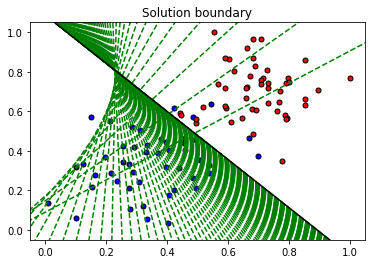

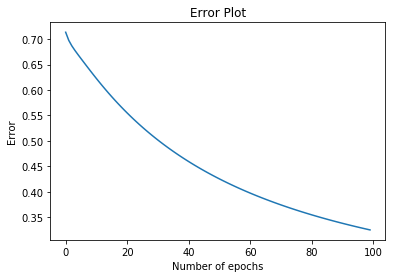

In [13]:
train(X, y, epochs, learnrate, True)

In [14]:
print('Original weights:', original_weights)
print('Original bias:', 0)
print('\nFinal weights:', final_weights)
print('Final bias:', final_bias)

Original weights: [-0.53076475663005063, 0.93080519076830948]
Original bias: 0

Final weights: [-3.67329516 -3.02049558]
Final bias: 3.28035458862


Hermoso, ¿no es así? Implementamos una red neuronal simple que nos permitió encontrar la línea que mejor separa nuestros datos de muestra y ahora permite predecir si, dado un nuevo alumno, será aceptado o rechazado.

Aunque este ejemplo es demasiado simple, el propósito es presentar las bases que te permitirán crear redes neuronales más complejas. No te preocupes si no entendiste el proceso, hay mucha información involucrada, así que asegúrate de volver a leer esta parte hasta que te sientas cómodo con todo el proceso.

Cuando estés listo, echa un vistazo a la segunda parte donde profundizaremos en redes neuronales complejas.

¡Nos vemos luego!

# Retroalimentación

Por favor, abre un nuevo *issue* en GitHub para cualquier corrección o comentario.